In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [36]:
df = pd.read_csv("./dataset/iris.csv")
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
X = df.drop(["Species", "Id"], axis=1)
y = df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [40]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

In [41]:
## 문자열이라 encoding시켜줘야함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [42]:
## one hot encoding 시켜줘야됨
import torch.nn.functional as F
from keras.utils import to_categorical

# y_train_o = F.one_hot(y_train)
y_train_o = to_categorical(y_train)
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [57]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(4,)),
    layers.Dense(units=8, activation='relu',),
    layers.Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                50        
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 3)                 27        
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [59]:
EPOCHS = 200
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train_o,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/200
6/6 [==============================] - 0s 22ms/step - loss: 1.3913 - accuracy: 0.1771 - val_loss: 1.2180 - val_accuracy: 0.2500
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 1.3406 - accuracy: 0.2083 - val_loss: 1.1943 - val_accuracy: 0.2500
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2930 - accuracy: 0.2188 - val_loss: 1.1736 - val_accuracy: 0.2500
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2550 - accuracy: 0.2292 - val_loss: 1.1564 - val_accuracy: 0.2500
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2195 - accuracy: 0.2500 - val_loss: 1.1407 - val_accuracy: 0.2500
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 1.1892 - accuracy: 0.2708 - val_loss: 1.1263 - val_accuracy: 0.2500
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 1.1648 - accuracy: 0.2708 - val_loss: 1.1135 - val_accuracy: 0.2500
Epoch 8/200
6/6 [=========

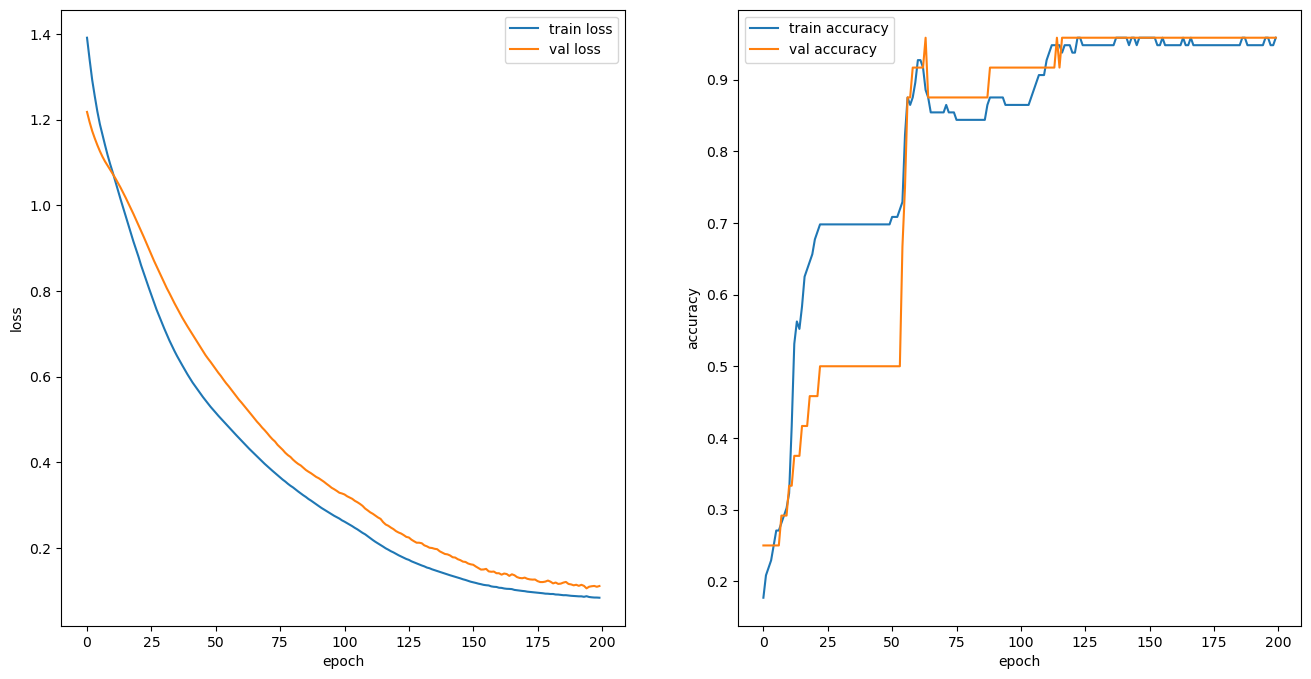

In [60]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

plot_history(history)

## Test

In [62]:
X_test_s = scaler.transform(X_test)

In [79]:
y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 15ms/step


array([[3.66366538e-03, 9.76681709e-01, 1.96546186e-02],
       [9.88809645e-01, 1.11881942e-02, 2.07216203e-06],
       [6.14935047e-10, 2.13149958e-03, 9.97868419e-01],
       [1.71818933e-03, 8.52824688e-01, 1.45457089e-01],
       [7.09124899e-04, 8.67484868e-01, 1.31806031e-01],
       [9.90688920e-01, 9.30835959e-03, 2.66488109e-06],
       [2.12876387e-02, 9.71361756e-01, 7.35068880e-03],
       [5.62649291e-07, 1.69914216e-02, 9.83008027e-01],
       [1.96479632e-05, 4.61538553e-01, 5.38441837e-01],
       [4.59630135e-03, 9.88223553e-01, 7.18008494e-03],
       [4.46294871e-05, 1.53889671e-01, 8.46065700e-01],
       [9.97275770e-01, 2.72416230e-03, 1.12537919e-07],
       [9.92892921e-01, 7.10595492e-03, 1.09070288e-06],
       [9.97171581e-01, 2.82836845e-03, 1.55112204e-07],
       [9.98585343e-01, 1.41430495e-03, 3.24643338e-07],
       [4.63827560e-03, 9.48588610e-01, 4.67731208e-02],
       [3.28181983e-07, 1.44338124e-02, 9.85565841e-01],
       [2.16435525e-03, 9.94195

In [80]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [82]:
y_test = encoder.transform(y_test)
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9666666666666667